<a href="https://colab.research.google.com/github/GiselaCS/Mujeres_Digitales/blob/main/3)_Modelo_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Qué factores están impulsando la discriminación salarial entre hombres y mujeres en su organización?

In [ ]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 2.5 MB/s 


In [ ]:
! pip install bqplot

     |████████████████████████████████| 1.2 MB 7.7 MB/s 


In [ ]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Objetivos(2 min)

En este caso, estableceremos una comprensión básica de las estadísticas necesarias para la regresión lineal y luego introduciremos la regresión lineal comenzando con 2 parámetros. Esperamos que los estudiantes comprendan a fondo los componentes funcionales de un modelo de regresión lineal, como la interpretación de los coeficientes y la comprensión de varias métricas para evaluar adecuadamente el rendimiento del modelo.

## Introducción(5 min)

**Contexto empresarial**. Eres un científico de datos en una gran organización. Su empresa está pasando por una revisión interna de sus prácticas de contratación y compensación a los empleados. En los últimos años, su empresa ha tenido poco éxito en la conversión de candidatas de alta calidad que deseaba contratar. La gerencia plantea la hipótesis de que esto se debe a una posible discriminación salarial y quiere averiguar qué la está causando.

**Problema empresarial** Como parte de la revisión interna, el departamento de recursos humanos se ha acercado a usted para investigar específicamente la siguiente pregunta: <b> "En general, ¿se les paga más a los hombres que a las mujeres en su organización? Si es así, ¿qué conduciendo esta brecha? "

**Contexto analítico**. El departamento de recursos humanos le ha proporcionado una base de datos de empleados que contiene información sobre varios atributos como rendimiento, educación, ingresos, antigüedad, etc. Usaremos técnicas de regresión lineal en este conjunto de datos para resolver el problema comercial descrito anteriormente. Veremos cómo la regresión lineal cuantifica la correlación entre la variable dependiente (salario) y las variables independientes (por ejemplo, educación, ingresos, antigüedad, etc.)

El caso está estructurado de la siguiente manera: (1) realizaremos un análisis de datos exploratorio para investigar visualmente las diferencias salariales; (2) utilizar los conocimientos observados para ajustar formalmente los modelos de regresión; y finalmente (3) abordar el tema de la discriminación salarial.

## Exploración de data (30 min)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
%cd '/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 9/'

/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 9


In [ ]:
Data = pd.read_csv('glassdoordata.csv')

In [ ]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
Data.shape

(1000, 9)

Las variables disponibles son:
* **job title**: el título del trabajo (por ejemplo, "Diseñador gráfico", "Ingeniero de software", etc.);
* **gender**: hombre o mujer;
* **age**: edad;
* **performance**: en una escala del 1 al 5, siendo 1 el más bajo y 5 el más alto;
* **education**: diferentes niveles de educación (por ejemplo, "Universidad", "Doctorado", "Maestría", "Escuela secundaria");
* **department**: diferentes departamentos de la organización (por ejemplo, "Operaciones", "Gestión", etc.);
* **seniority**: en una escala de 1 a 5, siendo 1 la más baja y 5 la más alta;
* **income, bonus**: ambos expresados en dólares

Como estamos interesados en la compensación total, creemos una nueva columna llamada <code>pay</code>:

In [ ]:
Data['pay'] = Data['income'] + Data['bonus']

In [ ]:
Data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


###  Ejercicio 1: (15 min)

#### 1.1 (2 min)

Construya una gráfica de caja comparando el salario entre hombres y mujeres. ¿Qué puedes concluir?

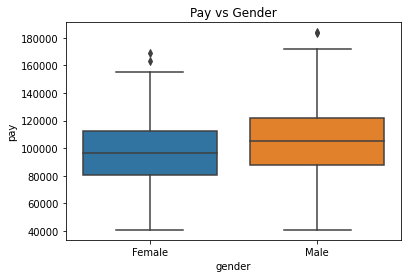

In [ ]:
#grafica por genero 
sns.boxplot(x='gender', y = 'pay', data = Data) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Pay vs Gender");
#el valor de las cajitas es la mediana

**Respuesta**. La mediana de hombres es mayor que la mediana para mujeres

#### 1.2 (3 min)

Realice una[$t$-prueba](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-test/) sobre la diferencia en el salario promedio entre hombres y mujeres. ¿Qué puedes concluir?

In [ ]:
Data.loc[Data['gender'] == 'Female', 'pay']

0       52301
2       99476
5       81016
6       78126
8      122812
        ...  
991    108986
992     84963
993     82673
994     88030
995     65914
Name: pay, Length: 468, dtype: int64

In [ ]:
## A simple t test for difference of means
t2, p2 = stats.ttest_ind(Data.loc[Data['gender'] == 'Male', 'pay'],Data.loc[Data['gender'] == 'Female', 'pay'])
print("t = " + str(t2))
print("p = " + str(p2))
#se comparan los valores frente al valor de significancia 0.05

t = 5.407461816876623
p = 8.000016978237565e-08


**Respuesta**.  Existe una diferencia estadísticamente significativa entre el salario de hombres y mujeres. El valor de $ p $ es mucho menor que 0.05.

#### 1.3 (10 min)
Construya un [boxplot](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/descriptive-statistics/box-plot/) de pago, con respecto a los siguientes atributos: antigüedad, educación, título de trabajo y desempeño . También haga un diagrama de dispersión de salario versus edad. ¿Qué patrones observas?

In [ ]:
Data.groupby('gender')['pay'].mean()

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64

In [ ]:
#Let us compute the average pay for men vs. women.
pay_by_gender = Data.groupby('gender')['pay']
pay_by_gender.mean()

gender
Female     96416.831197
Male      104918.678571
Name: pay, dtype: float64

In [ ]:
pay_by_gender.mean()['Male'] - pay_by_gender.mean()['Female']

8501.847374847363

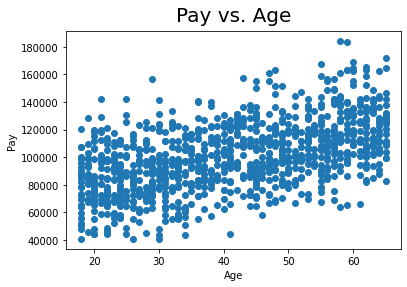

In [ ]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

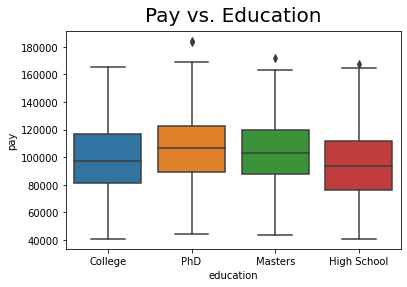

In [ ]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

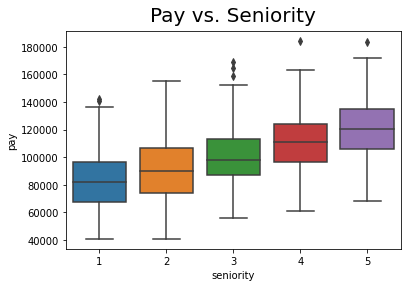

In [ ]:
sns.boxplot(x='seniority', y = 'pay', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

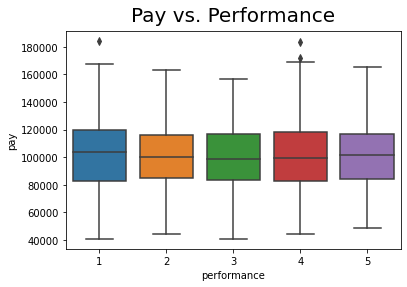

In [ ]:
sns.boxplot(x='performance', y = 'pay', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

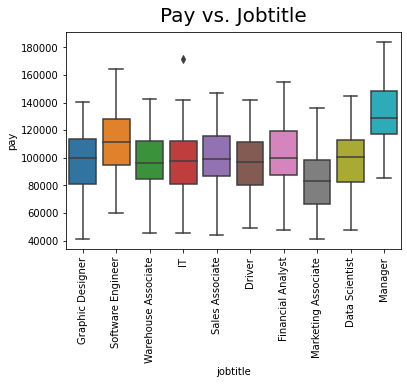

In [ ]:
sns.boxplot(x='jobtitle', y = 'pay', data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

***Respuesta:*** Existe una variación significativa de salario en algunos de los atributos. El pago aumenta con la antigüedad. Entre los títulos de trabajo, los gerentes reciben un salario relativamente alto en promedio. A los asociados de marketing se les paga mucho menos. El pago frente a la educación es similar para todas las categorías, excepto para las personas que solo tienen educación secundaria. Se les paga en promedio mucho menos. Existe una relación lineal entre salario y edad.

### Ejercicio 2: (10 min)

Ahora, hagamos las mismas gráficas que en el ejercicio 1.3, pero además diferenciemos por género. ¿Qué patrones observas?

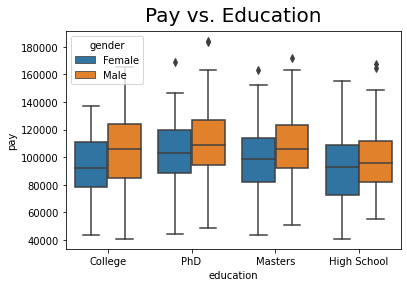

In [ ]:
sns.boxplot(x='education', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

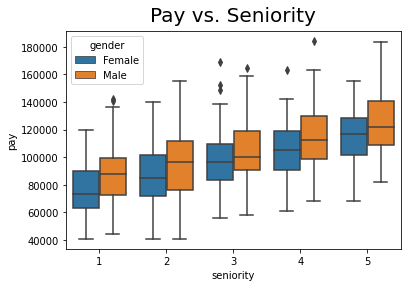

In [ ]:
sns.boxplot(x='seniority', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Seniority", fontsize=20, verticalalignment='bottom');

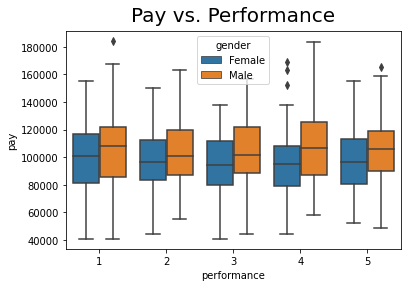

In [ ]:
sns.boxplot(x='performance', y = 'pay', hue = 'gender', data = Data) 
plt.title("Pay vs. Performance", fontsize=20, verticalalignment='bottom');

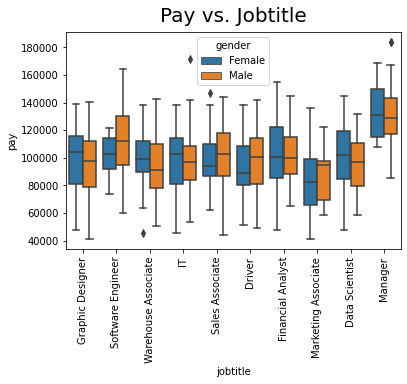

In [ ]:
sns.boxplot(x='jobtitle', y = 'pay', hue = 'gender',data = Data) 
plt.title("Pay vs. Jobtitle", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90);

**Respuesta**. Existe una gran variación de salario en varias categorías (como antigüedad, desempeño, título de trabajo, etc.). Dentro de cada categoría, existe alguna diferencia entre el salario de hombres y mujeres, pero no tanto como entre categorías.

### Ejercicio 3: (5 min)

Considere las siguientes declaraciones:

I. Según el diagrama de caja y la tabla, el salario promedio de los hombres es 8500 USD más que el de las mujeres en esta organización.

II. A los hombres se les paga significativamente más que a las mujeres debido únicamente a las diferencias de género.

¿Cuál de las siguientes conclusiones sobre estas afirmaciones es correcta?

a. Ambas declaraciones I y II son correctas.

b. La declaración I es correcta, pero la declaración II no.

c. La declaración I no es correcta, pero la declaración II sí lo es.

d. Ambas declaraciones I y II son incorrectas.

**Respuesta**. La declaración I es verdadera tal como lo muestran las tablas y el diagrama. Sin embargo, no podemos concluir que la Declaración II sea correcta. Esto se debe a que puede haber otros factores que contribuyan a un salario más alto para los hombres. Por ejemplo, los hombres en este conjunto de datos podrían estar todos en puestos de alto nivel, mientras que la mayoría de las mujeres en puestos de menor rango. El pago generalmente aumenta con la antigüedad. Por lo tanto, si no tomamos en cuenta la antigüedad al calcular la brecha salarial, podríamos estar comparando manzanas con naranjas.

## Que variables influencian en el pago? (10 min)

<p> Como discutimos en el ejercicio 3 y también vimos en la exploración de datos, aunque existe una brecha salarial significativa entre los géneros, también hay algunos otros factores en juego que están impulsando esta diferencia. Por lo tanto, ignorar estos factores al abordar la discriminación salarial podría llevar a conclusiones erróneas o engañosas sobre cómo abordar el problema. </p>

<p> ¿Cómo tenemos en cuenta la influencia de las otras variables en el salario? ¿Cuáles son estas variables?
Un buen lugar para comenzar es inspirarse en nuestro análisis de datos exploratorio anterior. La única variable numérica en este conjunto de datos es la edad, así que comencemos con un diagrama de dispersión de salario frente a edad: </p>

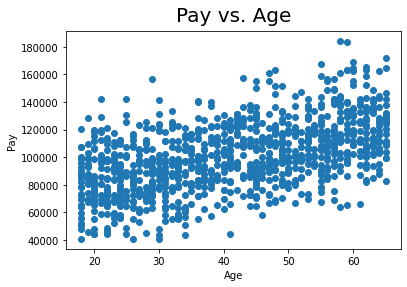

In [ ]:
plt.scatter(Data['age'],Data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay");

### Correlacion para medidas de relacion lineal entre dos variables
Vemos una relación lineal entre salario y edad. El salario parece estar <b> correlacionado </b> positivamente con la edad; es decir, cuanto mayor es una persona, más tienden a cobrar. Por lo tanto, podría ser que haya más hombres en nuestro conjunto de datos que sean mayores y la diferencia salarial entre hombres y mujeres que vemos podría ser una consecuencia de esto. La <b> correlación </b> cuantitativa mide qué tan lineal es la relación entre dos variables. Adivina la correlación entre salario y edad.

### Estimar la correlacion (5 min)

Para entrar en calor sobre el concepto de correlación, aquí hay algunos escenarios simulados. En cada uno de estos casos, adivine la correlación:

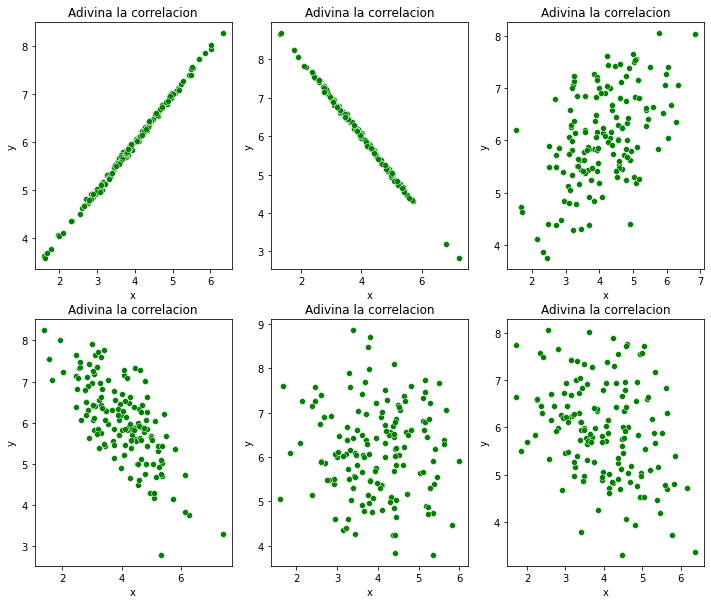

In [ ]:
plt.figure(figsize=(12,10))
rho = [0.999, -0.999, 0.5, -0.7,0.001,-0.3]
cor_list = []
np.random.seed(10)
for i, r in enumerate(rho):
    plt.subplot(2,3,i+1)
    mean, cov = [4, 6], [(1, r), (r, 1)]
    x, y = np.random.multivariate_normal(mean, cov, 150).T
    ax = sns.scatterplot(x=x, y=y, color="g")
    cor_list.append(np.corrcoef(x,y)[0,1])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Adivina la correlacion")

In [ ]:
cor_list

[0.9990081442281228,
 -0.9992506121564401,
 0.5047051300834758,
 -0.722898221972322,
 -0.040411257687132,
 -0.3208318426338665]

### Pregunta:

Si la correlación entre dos variables es cero, entonces las dos variables no están relacionadas. ¿Es esto verdadero o falso?

**Respuesta**. Eso es falso. Puede haber relaciones no lineales entre las variables, y es posible que no se capturen mediante la correlación, que es una medida lineal. En tales casos, se requieren modelos avanzados que capturen relaciones no lineales.

### Matriz de correlación (5 min)

Para encontrar las variables que tienen la mayor influencia en el salario, podemos calcular una <b> matriz de correlación </b> que mide las correlaciones por pares entre dos variables cualesquiera:

In [ ]:
corr_mat  = Data[['pay', 'age', 'seniority','performance']].corr()
corr_mat

,pay,age,seniority,performance
pay,1.000000,0.533715,0.530307,0.014155
age,0.533715,1.000000,-0.021414,-0.056875
seniority,0.530307,-0.021414,1.000000,-0.021127
performance,0.014155,-0.056875,-0.021127,1.000000


También podemos visualizar la [matriz de correlación](https://www.displayr.com/what-is-a-correlation-matrix/) arriba como un mapa de calor:

Text(0.5, 1.0, 'Correlation Matrix')

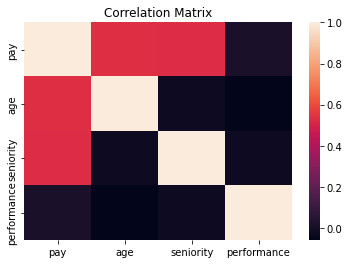

In [ ]:
sns.heatmap(corr_mat)
plt.title("Correlation Matrix")

## Uso de modelos lineales para tener en cuenta las variables correlacionadas con el salario (15 min)
Una vez que identificamos algunas variables independientes que están correlacionadas con la variable dependiente, se puede usar un modelo lineal para capturar esta relación cuantitativamente. Un modelo lineal hace esto al encontrar una línea que [**se ajuste mejor**](https://mathbits.com/MathBits/TISection/Statistics1/LineFit.htm) los puntos de datos:

Text(-1.0750000000000028, 0.5, 'Pay')

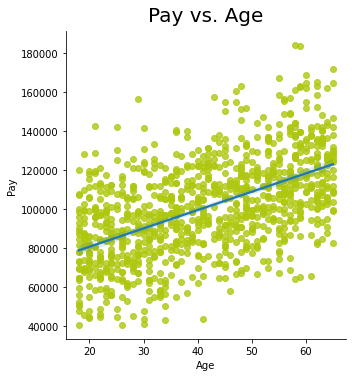

In [ ]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.xlabel("Age")
plt.ylabel("Pay")

Una línea tiene dos parámetros: intersección ($\beta_0$) y pendiente ($\beta_1$). Por tanto, un modelo lineal de salario frente a edad puede representarse como
  $$\mathrm{pago} = \beta_0 + \beta_1 \mathrm{edad} + \mathrm{error}. $$

La interpretación del coeficiente $ \beta_1$ es la siguiente: un aumento de un año en la edad conducirá en promedio a un cambio de $ \beta_1 $ USD en la paga. La intersección $ \beta_0 $ puede considerarse como una especie de pago "básico".

### Visualizacion interactiva (10 min)

La siguiente visualización interactiva le ofrece algunos escenarios. Intente encontrar la línea que mejor se ajuste a cada escenario:

In [ ]:
from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *

def run_scenario(scenario='1'):
    
    #determinar el escenario
    if (scenario == '1'):
        # definir x,y scenario 1
        x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000]
    elif (scenario=='2'): 
        # definir x,y scenario 2
        x_coor = [18, 26, 28, 30, 32, 34, 36, 38, 40, 20, 24]
        y_coor = [50000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 85000, 70000]
    elif (scenario=='3'): 
        # definir x,y scenario 3
        x_coor = [18, 20, 22, 32, 34, 36, 38, 40, 38, 36]
        y_coor = [50000, 53000, 60000, 80000, 75000, 88000, 90000, 92000, 50000, 52000]
    elif (scenario=='4'): 
        # definir x,y scenario 4
        x_coor = [18, 20, 22, 24, 26, 28, 30, 38, 40, 35, 22]
        y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 90000, 92000, 55000, 90000]

    # definir la escala linear para x,y
    x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
    y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

    # crear los ejes x,y usando escalas lineales
    ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
    ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

    #adicionar los puntos
    names = []

    for i in range(0, len(x_coor)):
        name = str(x_coor[i]) + ', ' + str(y_coor[i])
        names.append(name)

    def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

    scatter_dots = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, tooltip=def_tt, unhovered_style={'opacity': 0.5})
#     scatter2 = Scatter(x=[x_coor[1]], y=[y_coor[1]], scales={'x': x_sc, 'y': y_sc}, enable_move=True)

    #definir la linea de regresion
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_x_squared = 0
    sum_y_squared = 0
    n = len(x_coor)

    for i in range(0, len(x_coor)):
        sum_x += x_coor[i]
        sum_y += y_coor[i]
        sum_xy += sum_x * sum_y
        sum_x_squared += sum_x * sum_x
        sum_y_squared += sum_y * sum_y


    a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
    b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

    y_hat_values = []

    for x in x_coor:
        new_y_val = a + (b * x)
        y_hat_values.append(new_y_val)

    regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'], visible=False)

    #interaccion con el usuario 

    user_line_x = [19, 40]
    user_line_y = [60000, 60000]

    starting_user_line = Lines(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, colors=['green'])
    
    scatter = Scatter(x=user_line_x, y=user_line_y, scales={'x': x_sc, 'y': y_sc}, unhovered_style={'opacity': 0.5}, enable_move=True, colors=['black'])

    #crear figura dinamica
    fig = Figure(marks=[scatter_dots, scatter, starting_user_line, regression_line], axes=[ax_x, ax_y], title="Find the Regression Line of Best Fit")
    

    #adicionar menu en tiempo real 
    dropdown = widgets.Dropdown(
        options=['1', '2', '3', '4'],
        value=scenario,
        description='Scenario:',
        disabled=False,
    )

    out = Output()
    display(out)
    
    def handler(x):
        print('hi')
    
    @out.capture()
    def observe_scatter_x_y(point, change):
        
        
        x_array = point.x
        y_array = point.y
        find_change_x = change['point']['x']
        find_change_y = change['point']['y']
        hovered_point = point.hovered_point
        
        
        
        if (hovered_point == 0):
            starting_user_line.set_trait('x', [find_change_x, x_array[1]]) 
            starting_user_line.set_trait('y', [find_change_y, y_array[1]])
#             starting_user_line.y[0] = find_change_y
#             starting_user_line.x[0] = starting_user_line.x.pop(0)
#             starting_user_line.y = starting_user_line.y.pop(0)
#             starting_user_line.x = starting_user_line.x.insert(0, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(0, find_change_y)
        elif (hovered_point == 1):
            starting_user_line.set_trait('x', [x_array[0], find_change_x]) 
            starting_user_line.set_trait('y', [y_array[0], find_change_y])
#             starting_user_line.x = starting_user_line.x.pop(1)
#             starting_user_line.y = starting_user_line.y.pop(1)
#             starting_user_line.x = starting_user_line.x.insert(1, find_change_y)
#             starting_user_line.y = starting_user_line.y.insert(1, find_change_y)
            
        
        
        
#         if change['name'] == 'x':
#             line.x = line.x + change['new'] - change['old']
#         else:
#             line.y = line.y + change['new'] - change['old']
    
    scatter.on_drag(observe_scatter_x_y)

    @out.capture()
    def on_dropdown_change(b):
        fig.close()
        button.close()
        dropdown.close()
        run_scenario(dropdown.value)
       
    dropdown.observe(on_dropdown_change, 'value')

    #Adicionar funcionalidad de click 
    button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

    def on_button_clicked(b):
        regression_line.set_trait('visible', True)

    button.on_click(on_button_clicked)
    
    box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

    box = Box(children=[button], layout=box_layout)

    display(dropdown, fig, box)

run_scenario()


Output()

Dropdown(description='Scenario:', options=('1', '2', '3', '4'), value='1')

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

### Residuales (5 min)

El [residual](https://www.displayr.com/learn-what-are-residuals/) representa la diferencia entre la observación real y la predicha por la línea de regresión lineal, como se muestra a continuación:

Instrucciones:
     - Pase el cursor sobre los puntos de datos y verá sus coordenadas (x, y)
     - Seleccione (haciendo clic) el punto que cree que tiene el mayor residuo
     - Cuando haya seleccionado, haga clic en 'Ver respuesta' para ver el resultado

In [ ]:
from bqplot import *
from IPython.display import display
from bqplot.interacts import (
    FastIntervalSelector, IndexSelector, BrushIntervalSelector,
    BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
)
import ipywidgets as widgets
from ipywidgets import *
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)


# defining x,y coordinates, scenario 1
x_coor = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 39]
y_coor = [50000, 53000, 60000, 59000, 63000, 70000, 67000, 80000, 75000, 88000, 90000, 92000, 52000]

# defining linear scale for x,y axes
x_sc = LinearScale(min=min(x_coor), max=max(x_coor))
y_sc = LinearScale(min=min(y_coor), max=max(y_coor))

# creating x,y axes using linear scales above
ax_x = Axis(label='Age', scale=x_sc, grid_lines='dashed', num_ticks=8, label_color='blue')
ax_y = Axis(label='Income', scale=y_sc, orientation='vertical', label_color='blue', label_offset='50px')

#adding scatter marks
names = []

for i in range(0, len(x_coor)):
    name = str(x_coor[i]) + ', ' + str(y_coor[i])
    names.append(name)

def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

scatter = Scatter(x=x_coor, y=y_coor, scales={'x': x_sc, 'y': y_sc}, opacity=[0.5], tooltip=def_tt, selected_style={'fill':'red', 'stroke': 'red'}, selected=[5])

out = Output()
display(out)


@out.capture()
def on_scatter_click(marks, dot):
    marks.set_trait('selected', [dot['data']['index']])
    
scatter.on_element_click(on_scatter_click)

# defining in regression line
sum_x = 0
sum_y = 0
sum_xy = 0
sum_x_squared = 0
sum_y_squared = 0
n = len(x_coor)

for i in range(0, len(x_coor)):
    sum_x += x_coor[i]
    sum_y += y_coor[i]
    sum_xy += sum_x * sum_y
    sum_x_squared += sum_x * sum_x
    sum_y_squared += sum_y * sum_y


a = ((sum_y * sum_x_squared) - (sum_x * sum_xy)) / ((n * sum_x_squared) - (sum_x * sum_x))
b = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_squared) - (sum_x * sum_x))

y_hat_values = []

for x in x_coor:
    new_y_val = a + (b * x)
    y_hat_values.append(new_y_val)

regression_line = Lines(x=x_coor, y=y_hat_values, scales={'x': x_sc, 'y': y_sc}, colors=['red'])


#create figures and render
fig = Figure(marks=[scatter, regression_line], axes=[ax_x, ax_y], title='Find the Largest Residual',)


#add clicking action for submit
button = widgets.Button(description="See Answer", button_style='primary',  margin_left='40px', layout=Layout(display='flex', button_color='white', justify_content='center', width='300px'))

@out.capture()
def on_button_clicked(b):
    answer = 12
    scatter.set_trait('selected', [answer])
    residual_line=Lines(x=[x_coor[answer], x_coor[answer]], y=[y_coor[answer], y_hat_values[answer]], scales={'x': x_sc, 'y': y_sc}, colors=['red'])
    fig.set_trait('marks', [scatter, regression_line, residual_line])
    

button.on_click(on_button_clicked)

box_layout = Layout(display='flex',
                    justify_content='center',
                    width='50%')

box = Box(children=[button], layout=box_layout)

display(fig, box)

Output()

Figure(axes=[Axis(grid_lines='dashed', label='Age', label_color='blue', num_ticks=8, scale=LinearScale(max=40.…

Box(children=(Button(button_style='primary', description='See Answer', layout=Layout(display='flex', justify_c…

## Interpretar la salida de un modelo lineal (10 min)
El modelo lineal de salario versus edad se puede ajustar de la siguiente manera:

In [ ]:
model1 = 'pay~age'
lm1   = sm.ols(formula = model1, data = Data).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     397.5
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           1.04e-74
Time:                        19:56:34   Log-Likelihood:                -11384.
No. Observations:                1000   AIC:                         2.277e+04
Df Residuals:                     998   BIC:                         2.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.206e+04   2062.885     30.085      0.0

### ¿En qué debemos centrarnos en la tabla de regresión?
Aunque la tabla de salida anterior contiene mucha información, solo necesitamos enfocarnos en una pequeña cantidad de cantidades.
Estos son los coeficientes (las estimaciones de $ \beta_0 $ y $ \beta_1 $), así como sus valores de $p$ y $R$ al cuadrado.

### Coeficientes
La intersección $\beta_0$ es de aproximadamente 62060 USD. Esto se puede considerar como el salario base. (Con frecuencia, la intersección no tiene una interpretación significativa, eso está bien). La pendiente (el coeficiente $\beta_1$ para la edad) es 939,25. La interpretación de este coeficiente es como se explicó anteriormente: si un empleado envejece un año, se espera que su salario aumente en 939,25 USD en promedio.

Es importante tener en cuenta que la forma en que limpiamos/imputamos los datos antes del modelado tendrá grandes efectos en los coeficientes que obtenga. Un ejemplo simple es si convertimos arbitrariamente todos los valores faltantes a la media de ese parámetro. Esto conducirá a un coeficiente completamente diferente que si usáramos $k$ - imputación de vecinos más cercanos. Por eso es tan importante elegir cuidadosa y deliberadamente un método de imputación apropiado cuando se trata de datos faltantes o incorrectos.

### $p$-values
La hipotesis nula está dada por:
$$ H_0:  \beta_1 = 0 $$ 
y la alternativa es:
$$ H_a: \beta_1 \neq 0.$$
El [p-value](https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8) de $\beta_1$ (dado debajo de la columna: $"P>|t|"$) es 0.000. Por lo tanto, es estadísticamente significativo al nivel 0.05 y rechazamos la hipótesis nula. Esto implica que la edad explica algunas de las diferencias salariales.

No existe una forma perfecta o exacta de establecer un umbral de valor de $p$ estadísticamente significativo. Realmente depende de sus necesidades como profesional de datos $p$: los valores se utilizan para evaluar qué tan preciso creemos que es un coeficiente específico. ¿Qué tan seguro necesita que sea la interpretación de sus coeficientes? Generalmente, 0.05 es una heurística común pero no es un número estricto.

## $R$-cuadrado (15 min)

Una de las cantidades clave a las que se debe prestar atención al interpretar una tabla de regresión es la cantidad
[$R$ -cuadrado](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the- bondad de ajuste). Tenga en cuenta que la tabla muestra $ R $ al cuadrado y $ R $ ajustados al cuadrado. Nos centraremos en $ R $ al cuadrado. Esta cantidad siempre estará entre 0 y 1. Para el modelo de salario vs. edad, esta cantidad es 0.285 = 28.5%. En esta organización, hay una gran variación en el pago: diferentes empleados reciben diferentes cantidades.

Un $R$ al cuadrado de 28,5% en este modelo lineal significa que esta variación observada en el salario no se debe al azar; más bien, el factor edad explica sistemáticamente el 28,5% de esta variación salarial. Cuanto mayor sea el cuadrado de $ R $, mayor será el porcentaje de variación observada que puede ser explicada por el modelo. Dado que <code> model1 </code> solo explica alrededor del 28,5% de la variación, esto nos motiva a investigar si otros factores además de la edad pueden utilizarse para explicar las diferencias salariales.

### Relacion entre correlacion y $R$-cuadrado

In [ ]:
corr_age_pay = np.corrcoef(Data['pay'],Data['age'])[0,1]
corr_age_pay*corr_age_pay

0.2848512885110829

### Interpretacion geometrica del $R$-Squared
La formula para el $R$-squared es la siguiente:
  $$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$
Aquí [RSS](https://gerardnico.com/data_mining/rss) y [TSS](https://gerardnico.com/data_mining/tss) denotan la suma total y residual de cuadrados respectivamente. Para entender lo anterior fórmula con cuidado, tracemos el pago frente a la edad de nuevo.

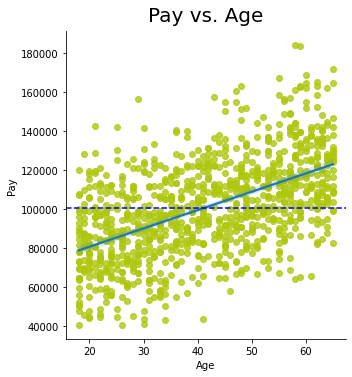

In [ ]:
sns.lmplot(x = 'age', y = 'pay', data = Data, scatter_kws = {'color': (174/255,199/255,14/255)})
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom')
plt.axhline(Data['pay'].mean(), ls='--',color = 'b')
plt.xlabel("Age")
plt.ylabel("Pay");

Consideremos el modelo <code>model0</code> dado por:
 $$ \mathrm{pay} = \beta_0 + \mathrm{error} $$
La mejor estimación para $ \beta_0 $ es solo el salario promedio. Esto viene dado por la línea azul. La suma de los cuadrados de los residuos aquí se llama la suma total de cuadrados (TSS).
R cuadrado mide qué tan bien la línea de regresión de <code> model1 </code> (pago frente a edad) dada por la línea roja explica la variación observada en comparación con <code> model0 </code>. La suma de los cuadrados residuales para este modelo es el RSS.

### Calculando el $R$-Squared escribiendo el codigo

In [ ]:
# you can 'peek' inside the object lm1 using the dir command
dir(lm1)
# for instance if you want to know what the fitted values are
## lm.fittedvalues

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [ ]:
lm1.fittedvalues

0       78967.935762
1       81785.686146
2       79907.185890
3       80846.436018
4       86481.936784
           ...      
995    119355.691254
996    115598.690743
997    107145.439594
998    123112.691765
999    118416.441126
Length: 1000, dtype: float64

In [ ]:
## Write code to find residuals from fitted values
res = Data['pay'] - lm1.fittedvalues
res[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [ ]:
## check if this is the same as that stored in lm1.resid
lm1.resid[0:5]

0   -26666.935762
1    37818.313854
2    19568.814110
3    37387.563982
4    22301.063216
dtype: float64

In [ ]:
#la media
mean_pay = Data['pay'].mean()

## Suma total de SSS
TSS = sum((Data['pay'] - mean_pay)*(Data['pay'] - mean_pay))
TSS

## Suma de cuadrados de residuales
RSS = sum(res*res)

In [ ]:
R_squared = (TSS - RSS)/TSS
R_squared

0.28485128851108443

## Mirando age vs gender: Variables Categoricas (10 min)

Ahora que hemos visto que la edad explica parte de la relación con el salario, consideremos un modelo en el que tengamos en cuenta la edad y el género simultáneamente. La edad es una variable numérica (p. Ej., 26,5, 32). Por el contrario, el género solo toma dos valores: masculino y femenino. Estas variables se denominan <b> variables categóricas </b>. La forma en que interpretamos los coeficientes de las variables factoriales en el modelo lineal es ligeramente diferente de los de las variables numéricas:

In [ ]:
Data

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


In [ ]:
model2 = 'pay~age + gender'
lm2    = sm.ols(formula = model2, data = Data).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     233.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           8.10e-84
Time:                        20:02:42   Log-Likelihood:                -11359.
No. Observations:                1000   AIC:                         2.272e+04
Df Residuals:                     997   BIC:                         2.274e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.674e+04   2151.480     26.

La interpretación del coeficiente de edad es la misma que antes: si la edad aumenta en un año, se espera que el salario aumente en 948,5 USD. Ahora, concéntrate en el coeficiente de género. Solo muestra masculino (T.male), porque la categoría femenina se toma como la categoría predeterminada. (Tenga en cuenta que la elección de la categoría predeterminada no importa; fácilmente podríamos haber elegido hacer masculino como categoría predeterminada y, por lo tanto, el coeficiente de género sería T.female). El coeficiente 9279.3180 se interpreta de la siguiente manera: para empleados de la misma edad, en promedio, los hombres ganan 9279,3180 USD más que las mujeres.

Pero todavía no hemos respondido satisfactoriamente a nuestra pregunta principal. Hasta ahora, solo hemos tenido en cuenta la edad además del género para explicar las diferencias salariales. Todavía hay algunos factores más que podrían afectar la paga. Consideramos la educación a continuación. La siguiente gráfica muestra que a los empleados con al menos una educación universitaria se les paga más:

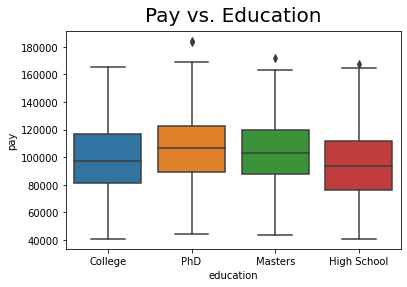

In [ ]:
sns.boxplot(x='education', y = 'pay', data = Data) 
plt.title("Pay vs. Education", fontsize=20, verticalalignment='bottom');

### Ejercicio 4: (5 min)

Proporcione el código para ajustar un modelo lineal con el salario como variable dependiente y la edad, el sexo y la educación como variables independientes. Compare el $ R $ -cuadrado de esto con el de <code> model2 </code>. ¿Qué conclusiones podemos sacar?

In [ ]:
model3 = 'pay~age + gender + education'
lm3   = sm.ols(formula = model3, data = Data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.7
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           8.74e-89
Time:                        20:05:14   Log-Likelihood:                -11340.
No. Observations:                1000   AIC:                         2.269e+04
Df Residuals:                     994   BIC:                         2.272e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
pago = 5.562e+04 + age * 942.4566 + masc * 8789.0942 + high * -3906.3104 + master * 4171.0770 + PhO * 6727.2845

**Respuesta**. El cuadrado de $ R $ ha aumentado del 28,5% al 34,5%. Esto significa que la educación ayuda a explicar un poco más variación que no se explica por la edad y el género.

### Ejercicio 5: (5 min)

¿Cuál de las siguientes afirmaciones es falsa? Después de tener en cuenta la edad y el sexo:

(a) A los empleados con educación universitaria se les paga 3906 USD más en promedio que a los que solo tienen un título de escuela secundaria.

(b) A los empleados con solo un título de escuela secundaria se les paga 7500,1 USD menos en promedio en comparación con aquellos con una maestría.

(c) Los empleados con un título de doctorado ganan en promedio 2556,20 USD más que los que tienen una maestría.

(d) Los empleados con una maestría ganan en promedio 8077,3 USD más que aquellos con solo un título de escuela secundaria.

**Respuesta**.
(a) Correcto. Para el modelo lineal: 'salario ~ edad + género + educación', la educación es una variable de factor y la educación universitaria es la predeterminada debido al orden alfabético. Obtenemos que el coeficiente de la escuela secundaria sea -3906,3104.

(b) ¡Incorrecto! Para el modelo lineal: 'salario ~ edad + género + educación', la diferencia de los coeficientes de la escuela secundaria y la maestría da la respuesta requerida. Esto se debe a que (escuela secundaria - universidad) - (maestría - universidad) = (escuela secundaria - maestría).

(c) ¡Incorrecto! Para el modelo lineal: 'salario ~ edad + género + educación', la diferencia de los coeficientes de maestría y doctorado da la respuesta requerida. Esto se debe a que (Doctorado - Universidad) - (Maestría - Universidad) = (Doctorado - Maestría).

(d) ¡Incorrecto! Para el modelo lineal: 'salario ~ edad + género + educación', la diferencia de los coeficientes de la escuela secundaria y la maestría da la respuesta requerida. Esto se debe a que (escuela secundaria - universidad) - (maestría - universidad) = (escuela secundaria - maestría).

## Modelo integrado teniendo en cuenta todas las variables (10 min)

Consideremos todos los demás factores que podrían explicar las brechas salariales a la vez. ¿Qué puedes concluir ?:

In [ ]:
lm = sm.ols(formula= 'pay ~ jobtitle + age + seniority + department', data = Data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:34:44   Log-Likelihood:                -10692.
No. Observations:                1000   AIC:                         2.142e+04
Df Residuals:                     984   BIC:                         2.149e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
model4 = 'pay~jobtitle + age + performance + education + department + seniority + gender'
lm4    = sm.ols(formula = model4, data = Data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     259.6
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:07:55   Log-Likelihood:                -10631.
No. Observations:                1000   AIC:                         2.130e+04
Df Residuals:                     979   BIC:                         2.141e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
model5 = 'pay~jobtitle+jobtitle*gender'
lm5    = sm.ols(formula = model5, data = Data).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     15.74
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           6.47e-45
Time:                        20:09:20   Log-Likelihood:                -11418.
No. Observations:                1000   AIC:                         2.288e+04
Df Residuals:                     980   BIC:                         2.297e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Ejercicio 6: (5 min)

Teniendo en cuenta todos los factores como en <code> model4 </code>, ¿cuál de los siguientes trabajos paga más?

(a) Sales Associate

(b) Software Engineer

(c) Manager

(d) Graphic Designer

**Respuesta**.

(a) Incorrecto.

(b) Incorrecto.

(c) ¡Correcto!

(d) Incorrecto.

## Revisando la cuestión de la discriminación salarial (7 min)

Ahora que hemos analizado y explicado varios atributos que se correlacionan con el salario, revisemos la cuestión de qué está impulsando la discriminación salarial. <code> model4 </code>, que representa todas las variables del conjunto de datos, tiene un $R$ al cuadrado del 84,1%. Esta es definitivamente una gran mejora con respecto a <code> model1 </code> (pago frente a edad) que tiene un $ R $ al cuadrado de 28,5%. Por lo tanto, en comparación con <code> model1 </code>, <code> model4 </code> explica 84,1% - 28,5% = 55,6% más de la variación observada en los datos.

### Ejercicio 7: (7 min)

Según el análisis que hemos realizado hasta ahora (<code> modelo1 </code> - <code> modelo4 </code>), considere las siguientes afirmaciones.

I. Después de tener en cuenta el cargo, la educación, el desempeño y la edad, la proporción de la diferencia salarial atribuible únicamente al género es pequeña.

II. Existe evidencia de que la discriminación salarial entre hombres y mujeres se debe únicamente al género.

III. Hay motivos para creer que podría haber una cantidad desproporcionada de mujeres en trabajos peor pagados
como marketing, mientras que podría haber más hombres en trabajos mejor pagados, como gerente.

Elija la respuesta correcta:

(a) I es correcto, II y III son incorrectos.

(b) II es correcto, I y III son incorrectos.

(c) I es incorrecta, II y III son correctas.

(d) I y III son correctos, II es incorrecto.

**Responder.**

(a) Incorrecto. Sabemos por el modelo4 que el coeficiente de género no es significativo (392.3244 USD, y este coeficiente no es significativo). Por tanto, yo es correcto y yo es incorrecto. Pero desde el primer diagrama que hicimos, vimos que la diferencia salarial promedio entre hombres y mujeres en esta organización es de unos 8500 USD. La explicación clave de esta discrepancia es que las mujeres tienen trabajos peor remunerados que los hombres. Por tanto, III es correcto.

(b) Incorrecto. Sabemos por el modelo4 que el coeficiente de género no es significativo (392.3244 USD, y este coeficiente no es significativo). Por tanto, yo es correcto y yo es incorrecto. Pero desde el primer diagrama que hicimos, vimos que la diferencia salarial promedio entre hombres y mujeres en esta organización es de unos 8500 USD. La explicación clave de esta discrepancia es que las mujeres tienen trabajos peor remunerados que los hombres. Por tanto, III es correcto.

(c) Incorrecto. Sabemos por el modelo4 que el coeficiente de género no es significativo (392.3244 USD, y este coeficiente no es significativo). Por tanto, yo es correcto y yo es incorrecto. Pero desde el primer diagrama que hicimos, vimos que la diferencia salarial promedio entre hombres y mujeres en esta organización es de unos 8500 USD. La explicación clave de esta discrepancia es que las mujeres tienen trabajos peor remunerados que los hombres. Por tanto, III es correcto.

(d) ¡Correcto! Sabemos por el modelo4 que el coeficiente de género no es significativo (392.3244 USD, y este coeficiente no es significativo). Por tanto, yo es correcto y yo es incorrecto. Pero desde el primer diagrama que hicimos, vimos que la diferencia salarial promedio entre hombres y mujeres en esta organización es de unos 8500 USD. La explicación clave de esta discrepancia es que las mujeres tienen trabajos peor remunerados que los hombres. Por tanto, III es correcto.

## Investigar la distribución de género según la antigüedad y los tipos de trabajo (10 min)

Motivados por el ejercicio 7, veamos cómo se distribuyen las mujeres en varios factores. La siguiente gráfica muestra que hombres y mujeres se distribuyen de manera similar por antigüedad:

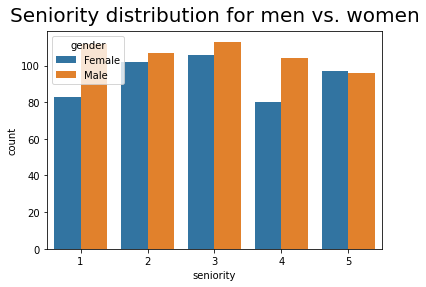

In [ ]:
sns.countplot(x='seniority', hue = 'gender', data = Data) 
plt.title("Seniority distribution for men vs. women", fontsize=20, verticalalignment='bottom');

Sin embargo, observar la distribución de las mujeres en varios tipos de trabajos revela una historia diferente. En el siguiente diagrama de barras, vemos que las mujeres están desproporcionadamente subrepresentadas en la ingeniería de software y los roles gerenciales. Además, las mujeres están desproporcionadamente sobrerrepresentadas en el puesto de asociado de marketing:

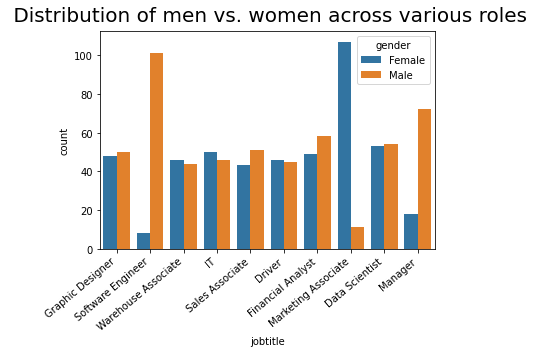

In [ ]:
pl = sns.countplot(x="jobtitle", hue= "gender", data= Data)
pl.set_xticklabels(pl.get_xticklabels(), rotation=40, ha="right");
plt.title(" Distribution of men vs. women across various roles", fontsize=20, verticalalignment='bottom');

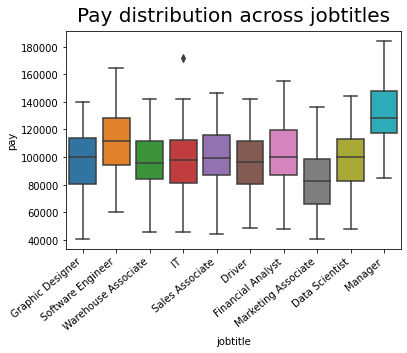

In [ ]:
pl2 = sns.boxplot(x="jobtitle", y = "pay", data = Data)
pl2.set_xticklabels(pl2.get_xticklabels(), rotation=40, ha="right");
plt.title("Pay distribution across jobtitles", fontsize=20, verticalalignment='bottom');

El gráfico anterior muestra que el gerente y el asociado de marketing tienen los salarios promedio más altos y más bajos, respectivamente. También vemos en el gráfico anterior que la proporción de mujeres es la más baja y la más alta en los roles de gerente y asociado de marketing, respectivamente. Esto explica visualmente el resultado de nuestro modelo de regresión acerca de por qué no hay evidencia de discrepancia salarial después de tener en cuenta todos estos factores.

## Conclusiones (5 min)

Usamos las técnicas de regresión lineal para determinar si existía o no discriminación salarial basada en el género dentro de su organización. Modelamos el efecto de varias variables independientes (en este caso, antigüedad, edad, desempeño y cargo) para explicar la variación observada en una variable dependiente (en este caso, el salario). Observamos la estadística de $ R $ al cuadrado de nuestros modelos lineales para ayudarnos a medir qué porcentaje de la variación observada en el pago se explica por las variables independientes.

Vimos que la diferencia en el salario promedio entre hombres y mujeres es de unos 8500 USD en estos datos. Sin embargo, esta diferencia se convirtió en 400 USD y es estadísticamente indistinguible (valor $ p $ = 0.584) de cero después de controlar los otros factores correlacionados con el salario. Sin embargo, una exploración más profunda de los datos sugirió que las mujeres están desproporcionadamente sobrerrepresentadas en los trabajos peor pagados, mientras que los hombres están desproporcionadamente sobrerrepresentados en los trabajos mejor pagados.

Por lo tanto, se justifica una investigación sobre las prácticas de contratación, promoción y colocación laboral de hombres y mujeres. En su informe al departamento de recursos humanos, debe pedirles que analicen las siguientes preguntas:
1. ¿Las mujeres eligen o se ven obligadas a aceptar trabajos peor pagados?
2. ¿Se discrimina a las mujeres en los procesos de contratación para trabajos mejor remunerados?

## Para llevar (7 min)
En este caso, aprendió cómo aprovechar sus habilidades en el análisis de datos exploratorios para construir un modelo lineal efectivo que tuvo en cuenta varios factores relacionados con el resultado de interés (pago). Fundamentalmente, aprendimos que:

1. No es suficiente mirar directamente la relación entre el resultado de interés y la variable independiente de interés; puede haber varios factores de confusión.
2. Llevar a cabo la EDA antes de construir cualquier modelo es importante para descubrir y tener en cuenta estos factores de confusión que podrían estar impulsando las diferencias en el resultado de interés.
3. $R$ al cuadrado es una cantidad importante que explica qué tan bien su modelo explicó la variación observada. Se puede utilizar para comparar diferentes modelos.
4. Analizar los coeficientes de una regresión lineal para comprender cómo los diversos parámetros impactan en el resultado final es extremadamente importante; esta interpretabilidad es una parte clave de la traducción de datos en acciones comerciales.

En estos días, los medios destacan constantemente los algoritmos de aprendizaje automático más avanzados, como las redes neuronales. Es importante que reconozca el inmenso valor de la regresión lineal, en particular por sus capacidades de inferencia e interpretabilidad. Si bien las redes neuronales pueden superar la regresión lineal en ciertas tareas, es mucho más una caja negra y comprender cómo los datos hacen que el modelo reaccione es extremadamente importante en la mayoría de los escenarios comerciales.